In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1


In [2]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

# Feature Engineering

### Simplify Job Title and Job Seniority

In [3]:
def title_simplifier(title):
    if "data scientist" in title.lower() or "data science" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"

def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "junior" in title.lower():
        return "jr"
    else:
        return "na"

In [4]:
df["job_simplified"] = df["Job Title"].apply(title_simplifier)
df.job_simplified.value_counts()

data scientist    313
na                166
data engineer     119
analyst           101
mle                22
manager            16
director            5
Name: job_simplified, dtype: int64

In [5]:
df["seniority"] = df["Job Title"].apply(seniority)
df.seniority.value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [6]:
df[df["job_simplified"] == "na"].head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,job_simplified,seniority
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,NY,1,8,0,0,0,0,0,na,na
16,"Scientist I/II, Biology",$67K-$137K (Glassdoor est.),"Scientist I/II, Biology\n\nCambridge, MA\n\nBI...",3.9,Blueprint Medicines\n3.9,"Cambridge, MA","Cambridge, MA",51 to 200 employees,2011,Company - Public,...,MA,1,11,0,0,0,0,1,na,na
43,Scientist,$52K-$113K (Glassdoor est.),"We are a global team of 6000 visionaries, doer...",3.4,Edgewell Personal Care\n3.4,"Allendale, NJ","Shelton, CT",5001 to 10000 employees,2015,Company - Public,...,NJ,0,7,0,0,0,1,0,na,na
48,Spectral Scientist/Engineer,$56K-$117K (Glassdoor est.),Thank you for your interest in joining the Cen...,4.7,Centauri\n4.7,"Beavercreek, OH","Chantilly, VA",501 to 1000 employees,1999,Company - Private,...,OH,0,23,0,0,0,0,0,na,na
69,R&D Data Analysis Scientist,$65K-$130K (Glassdoor est.),Applies developed level of subject matter know...,4.0,HP Inc.\n4.0,"Vancouver, WA","Palo Alto, CA",10000+ employees,1939,Company - Public,...,WA,0,83,0,0,0,0,0,na,na


### Fix Los Angeles on State

In [7]:
df["job_state"] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != "los angeles" else "CA")
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
WI     10
IN     10
AZ      9
MO      9
AL      8
KY      6
MI      6
DE      6
GA      6
IA      5
CT      5
NE      4
LA      4
OR      4
KS      3
NM      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

### Get Job Description Length

In [8]:
df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df["desc_len"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

### Get Competitor Count

In [9]:
df["competitors_count"] = df["Competitors"].apply(lambda x: len(x.split(",")) if x != "-1" else 0)
df["competitors_count"].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: competitors_count, dtype: int64

### Convert Hourly Wage to Annual Wage

In [10]:
df["min_salary"] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df["max_salary"] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)
df["min_salary"]

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: min_salary, Length: 742, dtype: int64

In [11]:
df[df.hourly == 1][["hourly", "min_salary", "max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified', 'seniority',
       'desc_len', 'competitors_count'],
      dtype='object')

### Remove Newline From company_txt

In [13]:
df["company_txt"] = df.company_txt.apply(lambda x: x.replace("\n", ""))
df["company_txt"]

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

### Visualize df.describe() using boxplot

In [14]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len,competitors_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

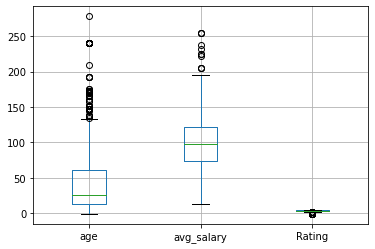

In [15]:
df.boxplot(["age", "avg_salary", "Rating"])

<AxesSubplot:>

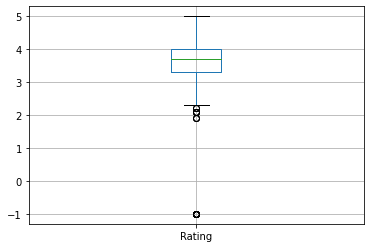

In [16]:
df.boxplot("Rating")

### Looking for Correlations

<AxesSubplot:>

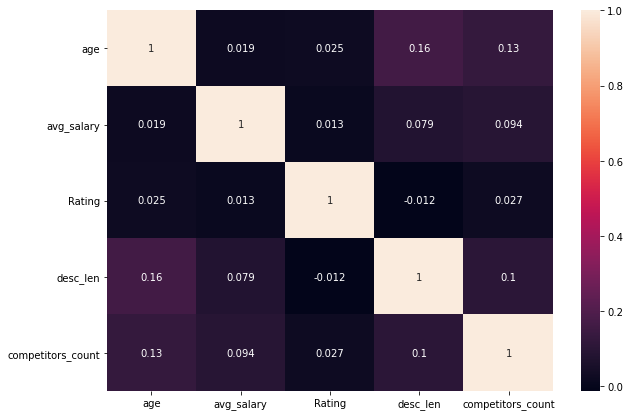

In [17]:
corr = df[["age", "avg_salary", "Rating", "desc_len", "competitors_count"]].corr()
plt.figure(figsize=(10,7))
sb.heatmap(corr, annot=True)

In [18]:
df_cat = df[["Location", "Headquarters", "Size", "Type of ownership", 'Industry', 'Sector', 'Revenue', "company_txt", "job_state", "same_state", "spark_yn", "aws_yn", "excel_yn", "job_simplified", "seniority"]]

Graph for Location: total = 200


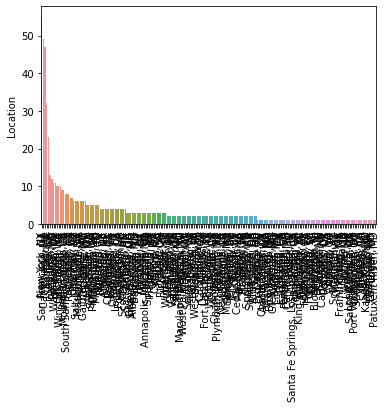

Graph for Headquarters: total = 198


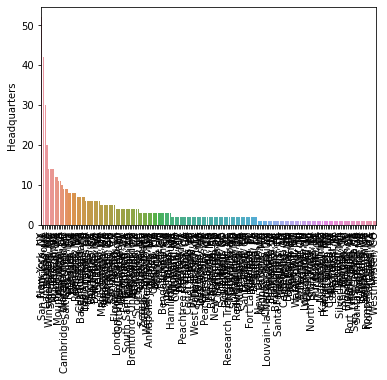

Graph for Size: total = 9


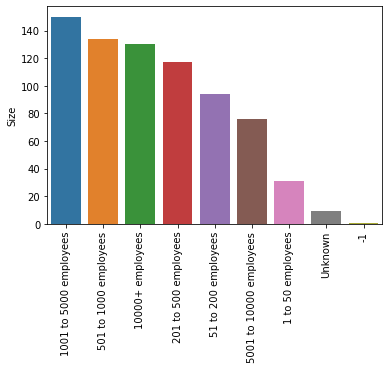

Graph for Type of ownership: total = 11


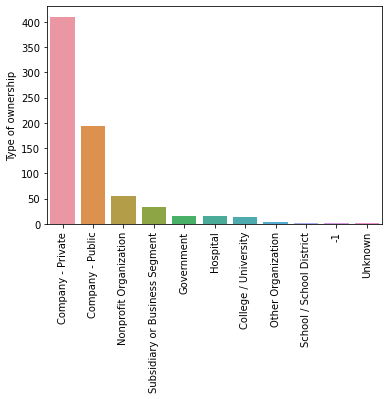

Graph for Industry: total = 60


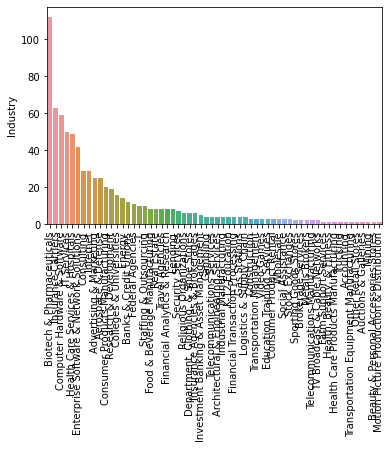

Graph for Sector: total = 25


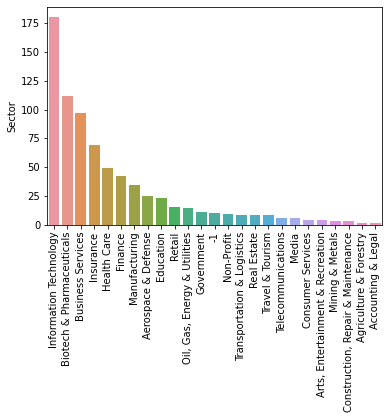

Graph for Revenue: total = 14


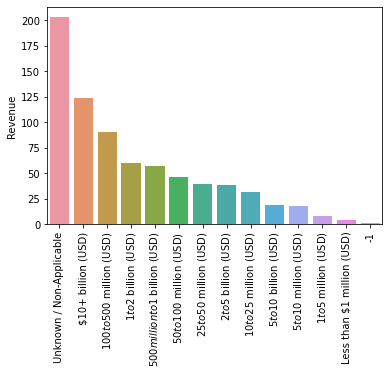

Graph for company_txt: total = 343


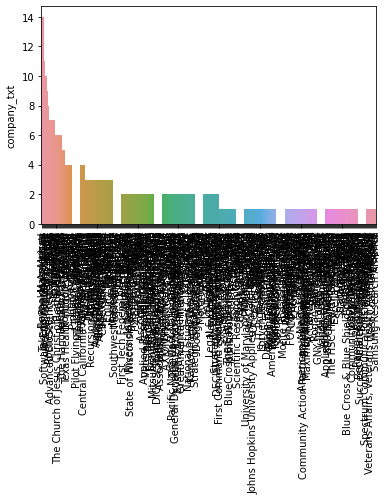

Graph for job_state: total = 37


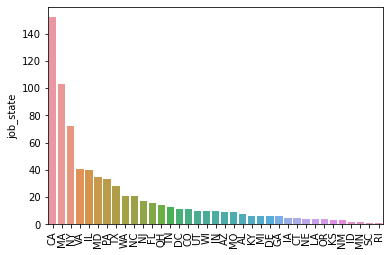

Graph for same_state: total = 2


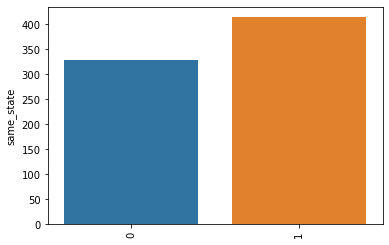

Graph for spark_yn: total = 2


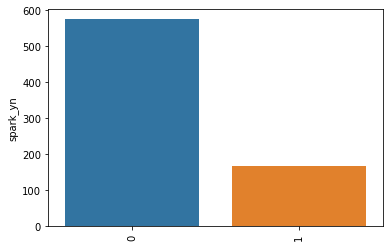

Graph for aws_yn: total = 2


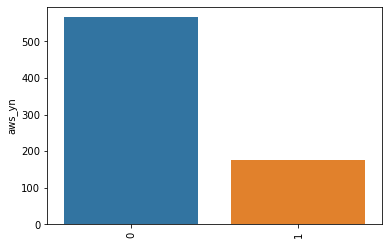

Graph for excel_yn: total = 2


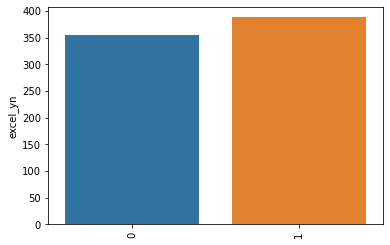

Graph for job_simplified: total = 7


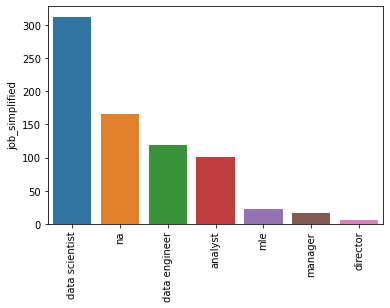

Graph for seniority: total = 3


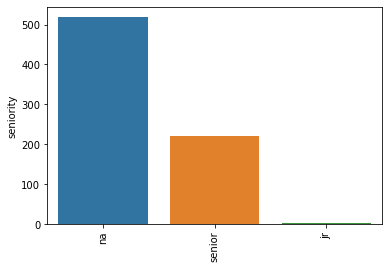

In [19]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for {}: total = {}".format(i, len(cat_num)))
    chart = sb.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


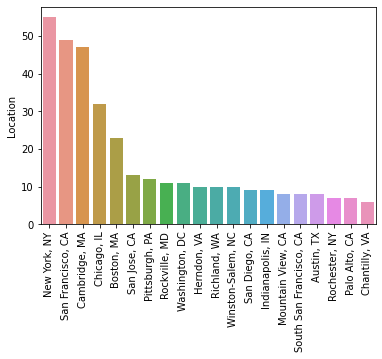

Graph for Headquarters: total = 20


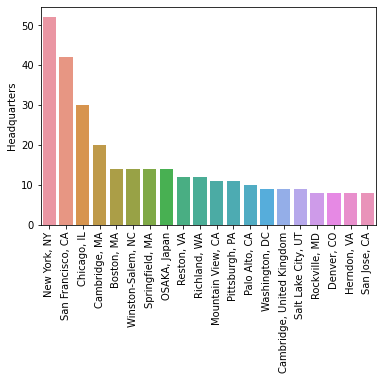

Graph for company_txt: total = 20


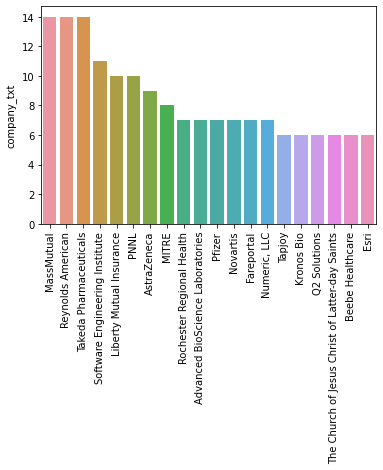

Graph for job_state: total = 20


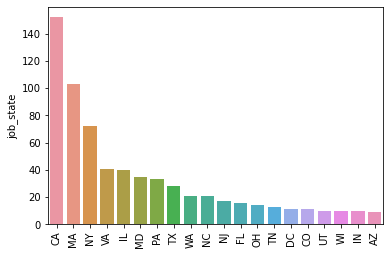

In [20]:
# look more carefully into big data
for i in df_cat[["Location", "Headquarters", "company_txt", "job_state"]].columns:
    cat_num = df_cat[i].value_counts()[:20] # get the top 20
    print("Graph for {}: total = {}".format(i, len(cat_num)))
    chart = sb.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [21]:
pd.pivot_table(df, index=["job_simplified", "seniority"], values="avg_salary")

avg_salary
job_simplified seniority            
analyst        jr          53.250000
               na          61.215278
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         110.191038
               senior     135.590000
director       na         130.800000
manager        na          73.218750
mle            na         119.133333
               senior     142.071429
na             na          71.773504
               senior     111.051020

In [22]:
pd.set_option("display.max_rows", None)
pd.pivot_table(df, index=["job_state", "job_simplified"], values="avg_salary", aggfunc="count").sort_values("job_state")

avg_salary
job_state job_simplified            
AL        analyst                  4
          data engineer            1
          data scientist           1
          na                       2
AZ        analyst                  1
          data engineer            5
          data scientist           3
CA        mle                      5
          manager                  7
          na                      23
          data engineer           25
          analyst                 18
          data scientist          74
CO        analyst                  1
          data engineer            3
          data scientist           3
          mle                      1
          na                       3
CT        data scientist           2
          na                       3
DC        analyst                  2
          data engineer            4
          data scientist           5
DE        na                       6
FL        data engineer            3
          data scientist           7
          analyst                  6
GA        data scientist           3
          na                       3
IA        analyst                  2
          data engineer            3
ID        analyst                  2
IL        na                       6
          analyst                  3
          data engineer            8
          data scientist          21
          mle                      2
IN        data scientist           3
          na                       3
          data engineer            4
KS        mle                      3
KY        data scientist           2
          na                       4
LA        analyst                  1
          data engineer            2
          na                       1
MA        manager                  3
          director                 5
          na                      42
          data engineer           12
          analyst                  4
          data scientist          37
MD        data scientist          13
          na                      16
          analyst                  3
          data engineer            3
MI        data scientist           4
          manager                  2
MN        analyst                  1
          data engineer            1
MO        analyst                  2
          data scientist           3
          manager                  1
          na                       3
NC        data engineer            6
          data scientist           3
          na                      12
NE        na                       4
NJ        na                       1
          manager                  2
          data engineer            2
          data scientist           6
          analyst                  6
NM        data scientist           3
NY        analyst                 14
          data engineer            4
          data scientist          40
          mle                      2
          na                      12
OH        na                       3
          analyst                  4
          data scientist           7
OR        data scientist           3
          data engineer            1
PA        analyst                  8
          data engineer            1
          data scientist          10
          manager                  1
          mle                      7
          na                       6
RI        analyst                  1
SC        na                       1
TN        analyst                  2
          data engineer           10
          data scientist           1
TX        data scientist          13
          na                       7
          data engineer            8
UT        analyst                  4
          data engineer            3
          data scientist           3
VA        analyst                  6
          data engineer           10
          data scientist          23
          mle                      2
WA        analyst                  3
          data scientist      

In [23]:
pd.set_option("display.max_rows", None)
pd.pivot_table(df[df.job_simplified == "data scientist"], index="job_state", values="avg_salary").sort_values("avg_salary", ascending=False)

,avg_salary
job_state,
DC,149.000000
IL,147.095238
CA,141.047297
UT,140.500000
MO,127.666667
NJ,125.083333
NC,117.000000
PA,115.800000
NY,115.250000


In [24]:
# rating, industry, sector, revenue, competitors_count, hourly, employer_provided, python_yn, r_yn, spark_yn, aws_yn, excel_yn, desc_len, Type of ownership
df_pivots = df[["Rating", "Industry", "Sector", "Revenue", "competitors_count", "hourly", "employer_provided", "python_yn", "r_yn", "spark_yn", "aws_yn", "excel_yn", "Type of ownership", "avg_salary"]]
df_pivots.head()

,Rating,Industry,Sector,Revenue,competitors_count,hourly,employer_provided,python_yn,r_yn,spark_yn,aws_yn,excel_yn,Type of ownership,avg_salary
0,3.8,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,1,0,0,0,1,Company - Private,72.0
1,3.4,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,1,0,0,0,0,Other Organization,87.5
2,4.8,Security Services,Business Services,$100 to $500 million (USD),0,0,0,1,0,1,0,1,Company - Private,85.0
3,3.8,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,1,0,0,0,0,Government,76.5
4,2.9,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,1,0,0,0,1,Company - Private,114.5


In [25]:
for i in df_pivots.columns:
    print(pd.pivot_table(df_pivots, index=i, values="avg_salary").sort_values("avg_salary", ascending=False))

        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Br

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [26]:
pd.pivot_table(df_pivots, index="Revenue", columns="python_yn", values="avg_salary", aggfunc="count")

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [27]:
!pip install wordcloud

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

You should consider upgrading via the 'c:\users\asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [28]:
def remove_stopwords_and_punctuation(text):
    words = word_tokenize(text)
    en_stopwords = stopwords.words("english")
    clean_words = [word for word in words if word not in en_stopwords]
    
    clean_words = [word for word in clean_words if word not in punctuation]
    
    lemmatizer = WordNetLemmatizer()
    clean_words = [lemmatizer.lemmatize(word) for word in clean_words]
    
    return clean_words

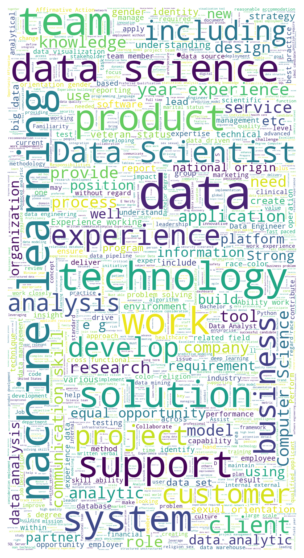

In [29]:
words = " ".join(df["Job Description"])

clean_words = remove_stopwords_and_punctuation(words)
text = " ".join([word for word in clean_words])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
df.to_csv("eda_data.csv")